# 129L Hw 2, Problem 1

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Part a)

Spherical coordinate $\{e_r, e_\theta, e_\phi\} \rarr (1, \theta, \phi)$ <br>
Cartesian coordinate $\{x, y, z\} \rarr (sin(\theta)cos(\phi), sin(\theta)sin(\phi), cos(\theta))$ <br>
Cylindrical coordinate $\{e_\rho, e_\psi, z\} \rarr (sin(\theta), \phi, cos(\theta))$

Spherical basis: <br>
$\hat{e}_r = \sin(\theta)\cos(\phi)\hat{x} + \sin(\theta)\sin(\phi)\hat{y} + \cos(\theta)\hat{z}$ <br>
$\hat{e}_\theta = \cos(\theta)\cos(\phi)\hat{x} + \cos(\theta)\sin(\phi)\hat{y} - \sin(\theta)\hat{z}$ <br>
$\hat{e}_\phi = -\sin(\phi)\hat{x} + \cos(\phi)\hat{y}$ <br>

Cylindrical basis: <br>
$\hat{e}_\rho = \cos(\phi)\hat{x} + \sin(\phi)\hat{y}$ <br>
$\hat{e}_\psi = -\sin(\phi)\hat{x} + \cos(\phi)\hat{y}$ <br>
$\hat{z} = \hat{z}$ <br>

In [8]:
def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r) if r != 0 else 0
    phi = np.arctan2(y, x)
    return r, theta, phi

def spherical_to_cylindrical(r, theta, phi):
    rho = r * np.sin(theta)
    psi = phi
    z = r * np.cos(theta)
    return rho, psi, z

def cylindrical_to_spherical(rho, psi, z):
    r = np.sqrt(rho**2 + z**2)
    theta = np.arctan2(rho, z) if r != 0 else 0
    phi = psi
    return r, theta, phi

def cartesian_to_cylindrical(x, y, z):
    rho = np.sqrt(x**2 + y**2)
    psi = np.arctan2(y, x)
    return rho, psi, z

def cylindrical_to_cartesian(rho, psi, z):
    x = rho * np.cos(psi)
    y = rho * np.sin(psi)
    return x, y, z

Part b)

In [17]:
def local_orthonormal_coords(theta, phi):
    """
    Compute the local orthonormal coordinate system on the unit sphere at (theta, phi).
    """
    # Radial unit vector
    e_r = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    
    # Polar unit vector
    e_theta = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])
    
    # Azimuthal unit vector
    e_phi = np.array([
        -np.sin(phi),
        np.cos(phi),
        0
    ])
    
    return e_r, e_theta, e_phi

In [18]:
# Generate the top half of a unit sphere
theta_vals = np.linspace(0, np.pi / 2, 10)  # Polar angles
phi_vals = np.linspace(0, 2 * np.pi, 20)   # Azimuthal angles

In [19]:
theta, phi = np.meshgrid(theta_vals, phi_vals)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

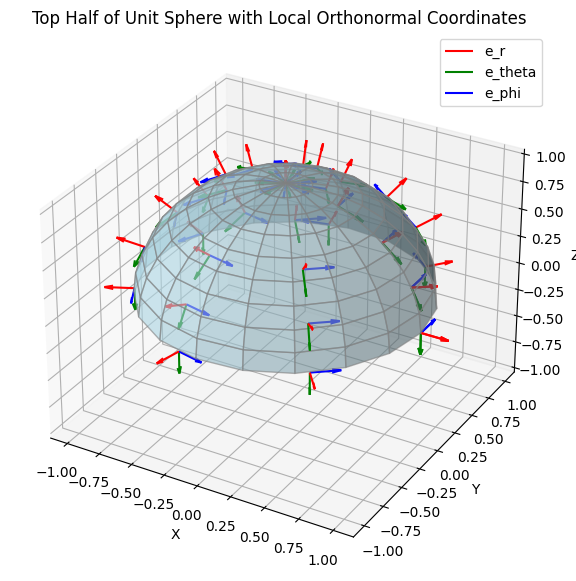

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='lightblue', alpha=0.6, edgecolor='gray')

# Select a few points on the sphere to display local coordinate systems
sample_thetas = np.linspace(0, np.pi / 2, 5)
sample_phis = np.linspace(0, 2 * np.pi, 8)

first_point = True  # To label the vectors only for the first point
for theta in sample_thetas:
    for phi in sample_phis:
        # Compute the point on the sphere
        r = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])
        
        # Get local orthonormal basis
        e_r, e_theta, e_phi = local_orthonormal_coords(theta, phi)
        
        # Plot the local basis vectors
        ax.quiver(*r, *e_r, color='red', length=0.2, normalize=True, label='e_r' if first_point else "")
        ax.quiver(*r, *e_theta, color='green', length=0.2, normalize=True, label='e_theta' if first_point else "")
        ax.quiver(*r, *e_phi, color='blue', length=0.2, normalize=True, label='e_phi' if first_point else "")
        first_point = False  # Disable further labeling

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlim(-1, 1)
ax.set_zlabel('Z')
ax.set_title('Top Half of Unit Sphere with Local Orthonormal Coordinates')
ax.legend(loc='upper right')
plt.show()

Part c)

No, you cannot easily plot the unit sphere in spherical basis because the basis itself is coordinate-dependent. Unlike with cartesian basis, if we move to a new point and try to plot with spherical basis, we will not have the same basis to compare to as at other parts of the sphere. 

Part d)

In [25]:
def generate_local_coords(f, x_vals, y_vals, dx=1e-4, dy=1e-4):
    Z = f(x_vals, y_vals)
    
    # Compute the gradients (∂f/∂x) and (∂f/∂y)
    fx = np.gradient(Z, axis=1, edge_order=2) / dx  # Gradient with respect to x
    fy = np.gradient(Z, axis=0, edge_order=2) / dy  # Gradient with respect to y
    
    # Tangent vectors in x and y directions
    e_x = np.array([1, 0, fx])
    e_y = np.array([0, 1, fy])
    
    # Compute the normal vector (gradient of surface)
    e_z = np.array([-fx, -fy, np.ones_like(fx)])
    
    # Normalize the normal vector
    norm_e_z = np.linalg.norm(e_z, axis=0)
    e_z = e_z / norm_e_z
    
    # Normalize the tangent vectors (optional)
    e_x = e_x / np.linalg.norm(e_x, axis=0)
    e_y = e_y / np.linalg.norm(e_y, axis=0)
    
    return e_x, e_y, e_z

Part e)